<a href="https://colab.research.google.com/github/Elsasser67/DataScience21/blob/main/Projekt/Kaggle_Projekt_Schnell_Theo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Link

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=921732bf233b22152be1f9b5bd32647ab1905a2eead40b18a192d8ce42ca02b1
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
!pip install pillow

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thoschnell","key":"c97b7dc6ac5e4979e58b1f3088161907"}'}

In [5]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
 ! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              231KB  2021-06-22 06:09:25           8016        692  1.0              
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4892        395  0.9375           
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1657        140  1.0              
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset 

# Download Kaggle Data

In [8]:
! kaggle competitions download -c 'retail-products-classification'

 97% 251M/259M [00:03<00:00, 67.8MB/s]
100% 259M/259M [00:03<00:00, 80.9MB/s]


In [9]:
! mkdir project

In [10]:
! unzip retail-products-classification.zip -d project

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: project/train/train/B001E6DLOQ.jpg  
  inflating: project/train/train/B001E6DM54.jpg  
  inflating: project/train/train/B001E6DMHW.jpg  
  inflating: project/train/train/B001E6FNQU.jpg  
  inflating: project/train/train/B001E6HVHO.jpg  
  inflating: project/train/train/B001E6HVOC.jpg  
  inflating: project/train/train/B001E6JCR6.jpg  
  inflating: project/train/train/B001E6LAH6.jpg  
  inflating: project/train/train/B001E6LAK8.jpg  
  inflating: project/train/train/B001E6LAUS.jpg  
  inflating: project/train/train/B001E6OCC6.jpg  
  inflating: project/train/train/B001E6TXCU.jpg  
  inflating: project/train/train/B001E6UUT0.jpg  
  inflating: project/train/train/B001E729CK.jpg  
  inflating: project/train/train/B001E76EJ4.jpg  
  inflating: project/train/train/B001E77NJ4.jpg  
  inflating: project/train/train/B001E77TUW.jpg  
  inflating: project/train/train/B001E8133K.jpg  
  inflating: project/t

# Importing libraries

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
#import PIL
import pathlib
import os.path
import os
import sklearn
import glob
from os import path
#from PIL import Image
from keras.preprocessing.image import load_img, img_to_array, image_dataset_from_directory
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications.mobilenet import preprocess_input

In [12]:
Categories = ["Electronics","Sports & Outdoors","Cell Phones & Accessories","Automotive","Toys & Games","Tools & Home Improvement","Health & Personal Care","Beauty","Grocery & Gourmet Food","Office Products","Arts, Crafts & Sewing","Pet Supplies","Patio, Lawn & Garden","Clothing, Shoes & Jewelry","Baby","Musical Instruments","Industrial & Scientific","Baby Products","Appliances","All Beauty","All Electronics",]

# Data Wrangling

## Load CSV Data

In [13]:
data_train = pd.read_csv("project/train.csv")
data_test = pd.read_csv("project/test.csv")

In [14]:
data_train.head()

,ImgId,title,description,categories
0,B000HYL1V6,TUNGSTEN SOLDER PICK WITH HANDLE,Solder Pick for picking up molten solder when ...,"Arts, Crafts & Sewing"
1,B00006HXWY,Write Right 98167 Screen Protector for Sony T615C,We all screen. And we all need to protect thos...,Cell Phones & Accessories
2,B000GAWSBS,Casio Mens DBC310-1 Databank 300 Digital Watch...,"Bringing you precision at a glance, the Casio ...","Clothing, Shoes & Jewelry"
3,B000040JOL,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Tools & Home Improvement
4,B00006IB78,Energizer 2 in 1 Light,This twoway light features a bright flashlight...,Health & Personal Care


In [15]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46229 entries, 0 to 46228
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ImgId        46229 non-null  object
 1   title        46228 non-null  object
 2   description  45187 non-null  object
 3   categories   46229 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


### Vizualise Data Characteristics

In [16]:
data_train.groupby('categories').count()

,ImgId,title,description
categories,,,
All Beauty,2200,2200,2190
All Electronics,2200,2199,2176
Appliances,2200,2200,2181
"Arts, Crafts & Sewing",2225,2225,2175
Automotive,2200,2200,1999
Baby,2200,2200,2177
Baby Products,2200,2200,2131
Beauty,2202,2202,2149
Cell Phones & Accessories,2200,2200,2188


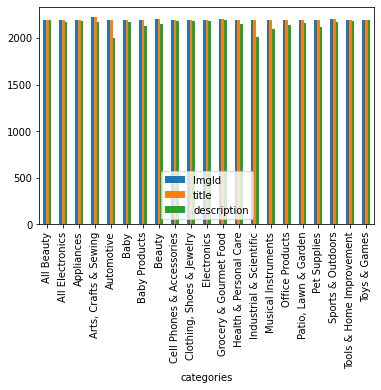

In [17]:
data_train.groupby('categories').count().plot(kind='bar')

We can see that there are entries without description. We shall first clean the data 

### Delete entries without description or title

In [18]:
np.where(pd.isnull(data_train))

(array([   68,   233,   250, ..., 46049, 46064, 46177]),
 array([2, 2, 2, ..., 2, 2, 2]))

In [19]:
data_train = data_train.drop(index=np.where(pd.isnull(data_train))[0])
data_test = data_test.drop(index=np.where(pd.isnull(data_test))[0])

In [20]:
data_train.groupby('categories').count()

,ImgId,title,description
categories,,,
All Beauty,2190,2190,2190
All Electronics,2176,2176,2176
Appliances,2181,2181,2181
"Arts, Crafts & Sewing",2175,2175,2175
Automotive,1999,1999,1999
Baby,2177,2177,2177
Baby Products,2131,2131,2131
Beauty,2149,2149,2149
Cell Phones & Accessories,2188,2188,2188


### Delete entries with no matching Image Id

In [21]:
name_list_train = data_train['ImgId'].tolist()
name_list_test = data_test['ImgId'].tolist()
i = 0
for imgid in name_list_train:
  if not path.exists('project/train/train/' + imgid + '.jpg'):    
    data_train = data_train.drop([data_train.index[i]])
    data_train = data_train.reset_index(drop=True)
  else:
    i+=1

i = 0
for imgid in name_list_test:
  if not path.exists('project/test/test/' + imgid + '.jpg'):    
    data_test = data_test.drop([data_test.index[i]])
    data_test = data_test.reset_index(drop=True)
  else:
    i+=1

### Delete Image with no entries

In [22]:
for filename in os.listdir('project/train/train/'):
  if not filename.split('.jpg')[0] in data_train['ImgId'].values:
    os.remove('project/train/train/' + filename)
    
for filename in os.listdir('project/test/test/'):
  if not filename.split('.jpg')[0] in data_test['ImgId'].values:
    os.remove('project/test/test/' + filename)

## Split CSV Data into Train and Validation Data

In [23]:
data_train = data_train.sample(frac=1).reset_index(drop=True)

data_train, data_val = sklearn.model_selection.train_test_split(data_train, test_size = 0.2, random_state = 1)

## Create Image folders categories

In [24]:
# os.mkdir('/content/project/val')

# for category in Categories:
#   os.mkdir('/content/project/val/' + category)
#   os.mkdir('/content/project/train/' + category)

## Divide the Image Train folder into train and validation

In [25]:
# name_list_val = data_val['ImgId'].tolist()

# for index, row in data_train.iterrows():
#   os.replace('/content/project/train/train/' + row['ImgId'] + '.jpg', '/content/project/train/' + row['categories'] + '/' + row['ImgId'] + '.jpg')

# for index, row in data_val.iterrows():
#   os.replace('/content/project/train/train/' + row['ImgId'] + '.jpg', '/content/project/val/' + row['categories'] + '/' + row['ImgId'] + '.jpg')

# os.rmdir('/content/project/train/train/')

## Read Image Data

In [26]:
name_list_train = data_train['ImgId'].tolist()
name_list_val = data_val['ImgId'].tolist()
name_list_test = data_test['ImgId'].tolist()
i = 0
img_train = []
for imgid in name_list_train:
  if path.exists('project/train/train/' + imgid + '.jpg'):
    image = tf.keras.preprocessing.image.load_img('project/train/train/' + imgid + '.jpg', color_mode='rgb', interpolation='Nearest')
    #input_arr = keras.preprocessing.image.img_to_array(image)
    img_train.append(image)
    i+=1
  else:
    data_train = data_train.drop([data_train.index[i]])
    data_train = data_train.reset_index(drop=True)

counter = 0
for imgid in img_train:
  input_arr = keras.preprocessing.image.img_to_array(imgid)
  img_train[counter] = input_arr
  counter += 1

i = 0
img_val = []
for imgid in name_list_val:
  if path.exists('project/train/train/' + imgid + '.jpg'):
    image = tf.keras.preprocessing.image.load_img('project/train/train/' + imgid + '.jpg', color_mode='rgb', interpolation='Nearest')
    #input_arr = keras.preprocessing.image.img_to_array(image)
    img_val.append(image)
    i+=1
  else:
    data_val = data_val.drop([data_val.index[i]])
    data_val = data_val.reset_index(drop=True)

counter = 0
for imgid in img_val:
  input_arr = keras.preprocessing.image.img_to_array(imgid)
  img_val[counter] = input_arr
  counter += 1

# i = 0
# img_test = []
# for imgid in name_list_test:
#   if path.exists('project/test/test/' + imgid + '.jpg'):    
#     image = tf.keras.preprocessing.image.load_img('project/test/test/' + imgid + '.jpg')
#     #input_arr = keras.preprocessing.image.img_to_array(image)
#     img_test.append(image)
#     i+=1
#   else:
#     data_test = data_test.drop([data_test.index[i]])
#     data_test = data_test.reset_index(drop=True)

In [27]:
# jpegFiles_train = [f for f in os.listdir('project/train/train/') if os.path.isfile(os.path.join('project/train/train/', f))]
# jpegFiles_val = [f for f in os.listdir('project/val/val/') if os.path.isfile(os.path.join('project/val/val/', f))]
# jpegFiles_test = [f for f in os.listdir('project/test/test/') if os.path.isfile(os.path.join('project/test/test/', f))]

In [28]:
# img_train = image_dataset_from_directory('project/train/',image_size=(100,100), shuffle = True, batch_size=32, label_mode='categorical')
# img_val = image_dataset_from_directory('project/val/',image_size=(100,100), shuffle = True, batch_size=32, label_mode='categorical')
# img_test = image_dataset_from_directory('project/test/', image_size=(100,100), shuffle = True, batch_size=32, labels = None)

In [29]:
img_train = np.asarray(img_train)
img_val = np.asarray(img_val)

In [30]:
img_train.shape

(32840, 100, 100, 3)

In [31]:
# del img_train

In [32]:
# img_train = np.asarray(img_train)
# img_val = np.asarray(img_val)
# img_test = np.asarray(img_test)

#img_train = img_train.astype(int, copy=False)
# img_val = img_val.astype(int)
# img_test = img_test.astype(int)

The data contained in data_train are now synchronized with the images and contains only data without NaN and only images that are contained in the folder image

## Sort ImgId

In [33]:
# data_train = data_train.set_index("ImgId")
# data_val = data_val.set_index("ImgId")
# data_test = data_test.set_index("ImgId")

In [34]:
# data_train = data_train.sort_index()
# data_val = data_val.sort_index()
# data_test = data_test.sort_index()

# data_train = data_train.reset_index()
# data_val = data_val.reset_index()
# data_test = data_test.reset_index()

In [35]:
#data_train, data_valid = sklearn.model_selection.train_test_split(data_train, test_size = 0.2, shuffle = False)

## Vizualize an image

The CS6 -- which sports the same great design as the Amoi S6 -- ups the ante by adding a color screen and support for MMS multimedia messaging. With a unique sliding design, the CS6 is great to have along on all your adventures. Use your existing GSM service with the CS6 to send text, picture and sound messages, surf the wireless web, and enjoy great polyphonic ringtones.DesignThe CS6's full-color display sports 128 x 128 resolution and support for 65,000 colors. Vital phone functions are controlled by the button pad below the screen, but when you want to make a call, simply reveal the slide-out number pad and dial away. The dial pad is crafted of metal and features a sapphire blue backlight.Calling FeaturesThe CS6's built-in address book can hold up to 200 contacts with up to eight entries per contact. Other calling features include caller ID, call hold, auto-redial, a minute reminder, and a date and time indicator for missed calls. There's also a call log that displays the last 20 ca

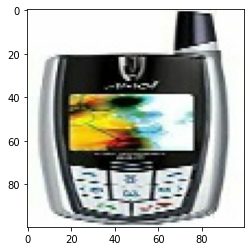

In [36]:
# for images, labels in img_train.take(1):
#   plt.imshow(images[1].numpy().astype("uint8"))
#   plt.axis("off")
plt.imshow(img_train[10000]/255)
print(data_train.iloc[10000]['description'])
print(data_train.iloc[10000]['categories'])

8.5 oz / 255 ml bottle with push cap. Safe for ages 6 months and older. Use for hair, face and body. Scented with a beautiful aromatherapy blend that includes lemongrass. Exceptional! Beautiful scent! Gentle! Works to rebalance pH! We can go on and on&#x2510; The structure of the hair is very vulnerable to drying agents such as sea salt, chlorine and styling aids. California Baby's silky Swimmer's Defense Shampoo & Bodywash works to wash them away gently yet thoroughly. We added a bit of moisture to our non-stripping and non-invasive cleansing formula to soothe stressed hair and dry itchy skin. No tears and extremely biodegradable. Perfect for year-round use. For blondes &#x2510;going green' after prolonged exposure to chlorine in swimming pools isn't unusual. In fact, sometimes darker hair can also develop a green tint to it too. According to studies, the problem is due to high concentrations of copper dissolved in the pool water. This can chemically interact with chlorine and the res

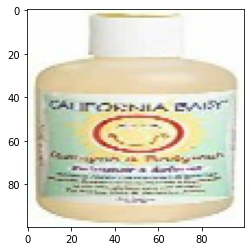

In [37]:
plt.imshow(img_val[8000]/255)
print(data_val.iloc[8000]['description'])
print(data_val.iloc[8000]['categories'])

In [38]:

#print(data_train.groupby("categories").get_group('All Beauty').first()

# Data Vizualisation

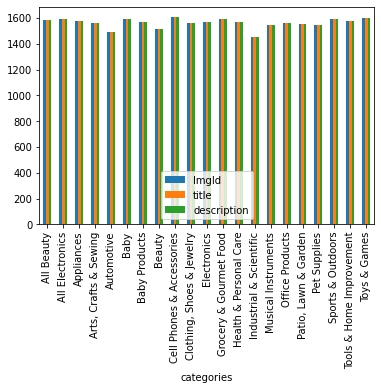

In [39]:
data_train.groupby('categories').count().plot(kind='bar')

We can see that there are a mean of 1500 products for each categories in the train dataset

In [40]:
nbWordsDescription = np.array([])
nbWordsTitle = np.array([])
for index, row in data_train.iterrows():
  nbWordsDescription = np.append(nbWordsDescription, len(row['description'].split()))
  nbWordsTitle = np.append(nbWordsTitle, len(row['title'].split()))

(array([  0., 125., 166., 267., 434., 545., 526., 548., 432., 480., 422.,
        401., 439., 410., 309., 343., 312., 354., 340., 332., 270., 323.,
        339., 330., 366., 319., 285., 285., 308., 370., 257., 291., 309.,
        312., 347., 285., 308., 336., 324., 323., 350., 305., 308., 418.,
        274., 277., 290., 234., 271., 263., 250., 246., 226., 228., 264.,
        216., 224., 231., 187., 214., 205., 223., 208., 185., 189., 224.,
        180., 227., 197., 170., 202., 168., 178., 179., 147., 184., 148.,
        145., 154., 162., 174., 175., 169., 156., 158., 168., 137., 152.,
        133., 121., 128., 126., 147., 138., 126., 106., 111.,  83., 100.,
        115.,  95.,  98., 104.,  84., 110., 130.,  96., 107.,  86.,  73.,
         93.,  75., 102.,  92.,  93.,  72.,  64.,  76.,  69.,  84.,  77.,
         85.,  81.,  68.,  79.,  61.,  68.,  62.,  75.,  82.,  89.,  84.,
         64.,  66.,  78.,  63.,  54.,  73.,  64.,  62.,  56.,  66.,  70.,
         48.,  61.,  49.,  54.,  40., 

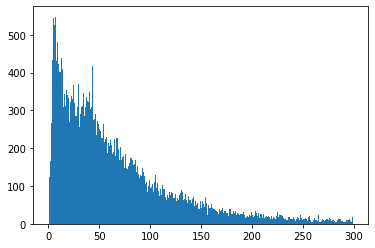

In [41]:
plt.hist(nbWordsDescription, bins=np.arange(300))

(array([0.000e+00, 9.900e+01, 4.290e+02, 1.079e+03, 2.473e+03, 3.845e+03,
        4.277e+03, 4.363e+03, 3.648e+03, 3.181e+03, 2.394e+03, 1.702e+03,
        1.378e+03, 9.940e+02, 6.770e+02, 4.710e+02, 3.280e+02, 2.520e+02,
        2.100e+02, 1.560e+02, 1.180e+02, 7.600e+01, 7.600e+01, 8.600e+01,
        6.400e+01, 5.400e+01, 4.600e+01, 3.900e+01, 2.300e+01, 1.500e+01,
        2.300e+01, 3.500e+01, 4.000e+01, 4.300e+01, 2.700e+01, 1.100e+01,
        1.200e+01, 1.600e+01, 1.500e+01, 1.100e+01, 7.000e+00, 3.000e+00,
        4.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 5.000e+00, 2.000e+00,
        2.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

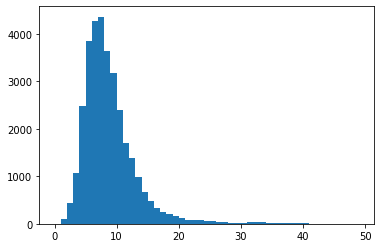

In [42]:
plt.hist(nbWordsTitle, bins=np.arange(50))

In [43]:
print("Minimum Number of words in description : ",nbWordsDescription.min(),"\nMaximum Number of words in description : ", nbWordsDescription.max(),"\nMean Number of words in description : ", nbWordsDescription.mean())

Minimum Number of words in description :  1.0 
Maximum Number of words in description :  1953.0 
Mean Number of words in description :  75.72551766138855


In [44]:
print("Minimum Number of words in title : ",nbWordsTitle.min(),"\nMaximum Number of words in title : ", nbWordsTitle.max(),"\nMean Number of words in title : ", nbWordsTitle.mean())

Minimum Number of words in title :  1.0 
Maximum Number of words in title :  89.0 
Mean Number of words in title :  8.423477466504263


We can see that the mean number of words in description is 75 Words, and in the title 8 Words

In [45]:
del nbWordsDescription, nbWordsTitle

# Text preparation

In [46]:
text_train = data_train["title"] + " " + data_train["description"]
text_val = data_val["title"] + " " + data_val["description"]

In [47]:
max_words = 1000
tokenize = tf.keras.preprocessing.text.Tokenizer(num_words = max_words)

In [48]:
tokenize.fit_on_texts(text_train)
train_text = tokenize.texts_to_matrix(text_train)
val_text = tokenize.texts_to_matrix(text_val)

In [49]:
train_text

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [50]:
text_train.iloc[10000]

"Amoi CS6 Unlocked Cell Phone--International Version with No Warranty (Silver) The CS6 -- which sports the same great design as the Amoi S6 -- ups the ante by adding a color screen and support for MMS multimedia messaging. With a unique sliding design, the CS6 is great to have along on all your adventures. Use your existing GSM service with the CS6 to send text, picture and sound messages, surf the wireless web, and enjoy great polyphonic ringtones.DesignThe CS6's full-color display sports 128 x 128 resolution and support for 65,000 colors. Vital phone functions are controlled by the button pad below the screen, but when you want to make a call, simply reveal the slide-out number pad and dial away. The dial pad is crafted of metal and features a sapphire blue backlight.Calling FeaturesThe CS6's built-in address book can hold up to 200 contacts with up to eight entries per contact. Other calling features include caller ID, call hold, auto-redial, a minute reminder, and a date and time i

https://www.kaggle.com/yufengdev/bbc-text-categorization

# Model Building

In [51]:
from __future__ import print_function
import tensorflow.keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [52]:
batch_size = 32
num_categories = 21 #fixed!
epochs = 10

## Categorie extraction

In [53]:
train_categories_column = data_train.loc[:,'categories'].values
val_categories_column = data_val.loc[:,'categories'].values

In [54]:
counter = 0
for i in train_categories_column:
  train_categories_column[counter] = Categories.index(i)
  counter += 1

counter = 0
for i in val_categories_column:
  val_categories_column[counter] = Categories.index(i)
  counter += 1

In [55]:
train_categories_column = np.asarray(train_categories_column).astype(int)
val_categories_column = np.asarray(val_categories_column).astype(int)

train_categories_column = pd.get_dummies(train_categories_column).values
val_categories_column = pd.get_dummies(val_categories_column).values

In [56]:
print(val_categories_column[0])
print(train_categories_column)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]]


## Text Model

In [57]:
# Build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(512, input_shape=(max_words,)))
model.add(keras.layers.Activation('relu'))
# model.add(layers.Dropout(drop_ratio))
model.add(keras.layers.Dense(num_categories))
model.add(keras.layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [58]:
model.fit(train_text, train_categories_column,
                    batch_size=batch_size,
                    epochs=10,
                    validation_data=(val_text, val_categories_column))

Epoch 1/10
1027/1027 [==============================] - 5s 4ms/step - loss: 1.4277 - accuracy: 0.5934 - val_loss: 1.1833 - val_accuracy: 0.6519
Epoch 2/10
1027/1027 [==============================] - 4s 4ms/step - loss: 0.9423 - accuracy: 0.7167 - val_loss: 1.1462 - val_accuracy: 0.6636
Epoch 3/10
1027/1027 [==============================] - 4s 4ms/step - loss: 0.7398 - accuracy: 0.7739 - val_loss: 1.1460 - val_accuracy: 0.6662
Epoch 4/10
1027/1027 [==============================] - 4s 4ms/step - loss: 0.5635 - accuracy: 0.8318 - val_loss: 1.1733 - val_accuracy: 0.6764
Epoch 5/10
1027/1027 [==============================] - 4s 4ms/step - loss: 0.4100 - accuracy: 0.8846 - val_loss: 1.2288 - val_accuracy: 0.6736
Epoch 6/10
1027/1027 [==============================] - 4s 4ms/step - loss: 0.2928 - accuracy: 0.9245 - val_loss: 1.3265 - val_accuracy: 0.6719
Epoch 7/10
1027/1027 [==============================] - 4s 4ms/step - loss: 0.2091 - accuracy: 0.9496 - val_loss: 1.4344 - val_accuracy:

In [59]:
val_text[1000]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [60]:
prediction = model.predict(np.array([val_text[1000]]))

In [61]:
val_categories_column[1000]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [63]:
prediction

array([[9.9953394e-24, 3.2274134e-09, 1.0106101e-16, 1.3263205e-16,
        3.2376313e-23, 1.1852950e-19, 3.6177069e-02, 9.6288675e-01,
        1.1587138e-17, 1.9069056e-20, 1.4967731e-16, 2.7937073e-12,
        8.1188212e-10, 6.2458194e-15, 1.1356230e-15, 5.8594808e-17,
        9.6318047e-09, 1.1278582e-08, 1.7196099e-17, 9.3619234e-04,
        2.0947640e-14]], dtype=float32)

In [70]:
print("Categorie predicted : " + Categories[model.predict(np.array([val_text[1000]])).argmax()])
print("Real categorie : " + Categories[val_categories_column[1000].argmax()])

Categorie predicted : Beauty
Real categorie : Beauty


## MobileNet

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras import layers
from tensorflow.keras.applications.mobilenet import MobileNet

In [ ]:
num_classes = 21
# model = tf.keras.models.Sequential([
#                                     keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(100,100,3)),
#                                     keras.layers.BatchNormalization(),
#                                     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#                                     keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
#                                     keras.layers.BatchNormalization(),
#                                     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#                                     keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#                                     keras.layers.BatchNormalization(),
#                                     keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#                                     keras.layers.BatchNormalization(),
#                                     keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#                                     keras.layers.BatchNormalization(),
#                                     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#                                     keras.layers.Flatten(),
#                                     keras.layers.Dense(4096, activation='relu'),
#                                     keras.layers.Dropout(0.5),
#                                     keras.layers.Dense(4096, activation='relu'),
#                                     keras.layers.Dropout(0.5),
#                                     keras.layers.Dense(21, activation='softmax')]
#                                     )
input_tensor = Input(shape=(100,100,3))
preprocess = tf.keras.applications.mobilenet.preprocess_input(input_tensor)
model = MobileNet(input_tensor=input_tensor, include_top=False, weights=None, classes=21)(preprocess)
# flatten_layer = tf.keras.layers.Flatten() (model.output)
output = tf.keras.layers.Flatten()(model)
output = tf.keras.layers.Dense(21, activation='softmax')(output)
final_model = tf.keras.Model(inputs=input_tensor, outputs= output)

In [ ]:
final_model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy'],
    run_eagerly=True
)

In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 100, 100, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 100, 100, 3)       0         
_________________________________________________________________
mobilenet_1.00_None (Functio (None, 3, 3, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 21)                193557    
Total params: 3,422,421
Trainable params: 3,400,533
Non-trainable params: 21,888
______________________________________________

In [ ]:
final_model.fit (
  img_train,
  train_categories_column,
  validation_data=(img_val, val_categories_column),
  epochs=30
)


Epoch 1/30
1027/1027 [==============================] - 167s 136ms/step - loss: 3.1789 - accuracy: 0.1073 - val_loss: 2.8505 - val_accuracy: 0.1369
Epoch 2/30
1027/1027 [==============================] - 129s 125ms/step - loss: 2.7774 - accuracy: 0.1625 - val_loss: 2.7627 - val_accuracy: 0.1762
Epoch 3/30
1027/1027 [==============================] - 139s 135ms/step - loss: 2.6802 - accuracy: 0.1938 - val_loss: 2.7240 - val_accuracy: 0.1793
Epoch 4/30
1027/1027 [==============================] - 137s 134ms/step - loss: 2.5994 - accuracy: 0.2194 - val_loss: 2.6981 - val_accuracy: 0.1978
Epoch 5/30
1027/1027 [==============================] - 128s 124ms/step - loss: 2.5232 - accuracy: 0.2460 - val_loss: 2.5941 - val_accuracy: 0.2302
Epoch 6/30
1027/1027 [==============================] - 127s 124ms/step - loss: 2.4494 - accuracy: 0.2651 - val_loss: 2.8607 - val_accuracy: 0.1835
Epoch 7/30
1027/1027 [==============================] - 136s 132ms/step - loss: 2.3851 - accuracy: 0.2851 - val_

https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
hey=mpimg.imread('project/train/train/B000O8U1EI.jpg')

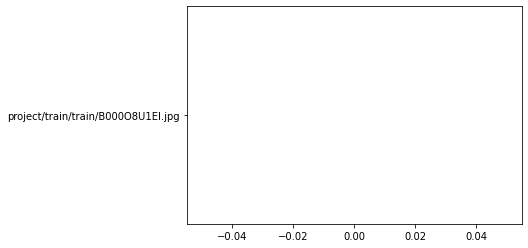

In [ ]:
plt.plot('project/train/train/B000O8U1EI.jpg')

In [ ]:
hey = tf.keras.preprocessing.image.load_img('project/train/train/B000O8U1EI.jpg')
input_arr = keras.preprocessing.image.img_to_array(hey)
input_arr = np.array([input_arr])

In [ ]:
result = final_model.predict(input_arr)

In [ ]:
result

array([[5.5936078e-05, 8.1077646e-03, 4.8092152e-05, 2.8535262e-05,
        3.8096467e-03, 2.1950816e-04, 3.4812281e-05, 1.0280904e-03,
        7.9249694e-06, 1.7421054e-02, 6.6133781e-04, 7.5809663e-04,
        1.0007705e-06, 9.2102988e-03, 8.3306841e-05, 4.8261594e-05,
        6.4924093e-06, 9.2642251e-03, 2.3567337e-03, 9.4577092e-01,
        1.0779237e-03]], dtype=float32)

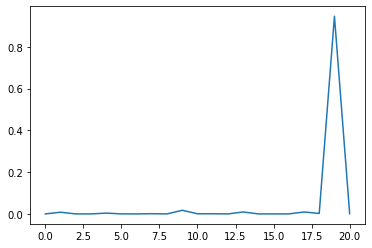

In [ ]:
plt.plot(result[0])

In [ ]:
# for data_batch, labels_batch in img_train:
#     print('data batch shape:', data_batch.shape)
#     print('labels batch shape:', labels_batch.shape)
#     break
